In [175]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [176]:
messages = pd.read_csv('SMSSpamCollection', sep='\t',names=["label", "message"])

In [177]:
lema = WordNetLemmatizer()
corpus = []

In [178]:
for i in range(len(messages)):
    text = re.sub('[^a-zA-Z]', ' ', messages['message'][i]) #only retains letters
    text = text.lower() #converts everything to lower character
    text = text.split() #converts sentence to a list
    text = [lema.lemmatize(word) for word in text if not word in stopwords.words('english')] #lematization and stop word removal
    text = " ".join(text) #converting again to sentence
    corpus.append(text)   #preparing to feed it to countvectorizer

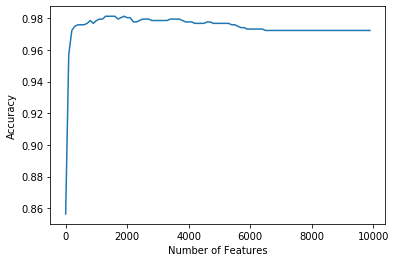

In [193]:
num_features = []
acc = []
for i in range(1,10000,100):
    tfidf = TfidfVectorizer(max_features=i) #after several trails 
    X = tfidf.fit_transform(corpus).toarray()
    y=pd.get_dummies(messages['label'])
    y=y.iloc[:,1].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    spam_detect_model = MultinomialNB().fit(X_train, y_train)
    y_pred=spam_detect_model.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))
    num_features.append(i)
plt.plot(num_features,acc)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.show()

In [194]:
print('Hence max number of features should be',num_features[acc.index(max(acc))],'with an accuracy of',max(acc)*100,'percent')

Hence max number of features should be 1301 with an accuracy of 98.11659192825111 percent


In [195]:
tfidf = TfidfVectorizer(max_features=1301)  
X = tfidf.fit_transform(corpus).toarray()

In [196]:
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values # 1 if it is a spam else 0

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [198]:
spam_detect_model = MultinomialNB().fit(X_train, y_train) #training the model